In [61]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules
import pickle

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings("ignore")
n_classifier = 7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# #plot_3d_var_list = ['beta2', 'beta4','low_gamma3']

# p231, p222_1, p222_2, p229 = \
# pickle.load(open(hp.prepath_pat + '231' +'_trained.p', "rb" )),\
# pickle.load(open(hp.prepath_pat + '222_1' +'_trained.p', "rb" )), \
# pickle.load(open(hp.prepath_pat + '222_2' +'_trained.p', "rb" )), \
# pickle.load(open(hp.prepath_pat + '229_trained.p', "rb" ))

# pats = [p231, p222_1, p222_2, p229]
p231_o = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/231_trained.p', "rb" ))


In [36]:
# p231_124_d = pickle.load(open(hp.prepath_pat + '231_trained_124_d.p', "rb" ))
# p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nd.p', "rb" ))
p231_90_nd = pickle.load(open(hp.prepath_pat + '231_trained_90_nd.p', "rb" ))
p222_1_90_nd = pickle.load(open(hp.prepath_pat + '222_1_trained_90_nd.p', "rb" ))
p222_2_90_nd = pickle.load(open(hp.prepath_pat + '222_2_trained_90_nd.p', "rb" ))
p229_90_nd = pickle.load(open(hp.prepath_pat + '229_trained_90_nd.p', "rb" ))

# p231_o = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/231_trained.p', "rb" ))
# p231_oo = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/231.p', "rb" ))
#p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nonout.p', "rb" ))

pats_90_nd = [p231_90_nd, p222_1_90_nd, p222_2_90_nd, p229_90_nd]

In [24]:
p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nd.p', "rb" ))
p222_1_124_nd = pickle.load(open(hp.prepath_pat + '222_1_trained_124_nd.p', "rb" ))
p222_2_124_nd = pickle.load(open(hp.prepath_pat + '222_2_trained_124_nd.p', "rb" ))
p229_124_nd = pickle.load(open(hp.prepath_pat + '229_trained_124_nd.p', "rb" ))
pats_124_nd = [p231_124_nd, p222_1_124_nd, p222_2_124_nd, p229_124_nd]

In [21]:
p231_124_d = pickle.load(open(hp.prepath_pat + '231_trained_124_d.p', "rb" ))
p222_1_124_d = pickle.load(open(hp.prepath_pat + '222_1_trained_124_d.p', "rb" ))
p222_2_124_d = pickle.load(open(hp.prepath_pat + '222_2_trained_124_d.p', "rb" ))
p229_124_d = pickle.load(open(hp.prepath_pat + '229_trained_124_d.p', "rb" ))
pats_124_d = [p231_124_d, p222_1_124_d, p222_2_124_d, p229_124_d]

In [26]:
p231_124_d_no = pickle.load(open(hp.prepath_pat + '231_trained_124_d_no.p', "rb" ))
p222_1_124_d_no = pickle.load(open(hp.prepath_pat + '222_1_trained_124_d_no.p', "rb" ))
p222_2_124_d_no = pickle.load(open(hp.prepath_pat + '222_2_trained_124_d_no.p', "rb" ))
p229_124_d_no = pickle.load(open(hp.prepath_pat + '229_trained_124_d_no.p', "rb" ))
pats_124_d_no = [p231_124_d_no, p222_1_124_d_no, p222_2_124_d_no, p229_124_d_no]

In [41]:
# plot_funcs.plot_epoch_mean(pats, if_save = 0)
p231

,filename,region_start_time,sleep,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,...,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
647,1.313099e+17,2017-02-07 04:00:28.972800,1.0,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,...,41.280686,25.052553,26.931398,24.740500,22.402387,456.290919,504.995728,590.395180,234.908162,1.0,0.0,0,True,231,False
648,1.313099e+17,2017-02-07 10:00:26.985600,0.0,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,...,39.005670,25.407701,25.493819,26.304463,22.143664,427.239571,381.793350,438.397733,206.820731,0.0,0.0,0,True,231,False
649,1.313100e+17,2017-02-07 16:00:26.035200,0.0,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,...,41.514227,27.523998,26.306771,28.865205,22.853450,522.376569,393.975260,512.293985,219.247318,0.0,1.0,0,True,231,False
650,1.313103e+17,2017-02-07 22:00:12.988800,0.0,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,...,33.809532,25.943668,27.780222,24.305595,19.526904,627.026604,626.899623,468.444107,208.923204,4.0,2.0,0,True,231,False
651,1.313103e+17,2017-02-08 04:00:12.038400,1.0,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,...,35.571129,25.237187,23.680726,26.080258,21.100966,456.565769,425.212688,514.410648,219.907144,0.0,0.0,0,True,231,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1.316288e+17,2018-02-11 15:51:35.971200,0.0,104.142656,43.925946,121.402267,44.771501,100.667476,52.816564,128.193040,57.710658,73.100934,80.999027,84.178656,55.898530,...,57.017947,35.054053,30.561880,34.055171,26.327198,565.235824,433.611692,565.892970,318.116432,0.0,1.0,11,False,231,False
1536,1.316296e+17,2018-02-11 21:51:24.998400,0.0,113.162000,50.395396,91.166914,40.079455,89.966879,90.940386,96.887581,31.257395,71.331918,74.857445,60.687237,23.724263,...,39.175853,29.381314,29.061903,31.572590,24.162478,553.015062,520.205682,477.339595,202.079093,1.0,1.0,11,False,231,False
1537,1.316296e+17,2018-02-12 03:51:23.011200,1.0,225.536331,153.708886,189.820605,71.536294,225.670238,264.015213,207.829890,114.269363,205.670618,163.124737,92.963880,126.173273,...,61.020523,43.167140,40.375479,33.251599,28.278869,1164.053593,966.641831,753.566978,560.389747,5.0,8.0,11,False,231,False
1538,1.316296e+17,2018-02-12 09:51:21.974400,0.0,85.753303,34.006378,103.498303,41.858699,113.615081,76.859677,149.850580,64.627288,60.633478,73.064497,64.475270,22.612823,...,39.918934,31.170735,28.318351,34.481422,25.607426,539.689490,458.521869,543.486784,239.335682,0.0,0.0,11,False,231,False


## 3. Classifier Performance

### Performace Overview of each Classifier

In [64]:
for pat in pats_124_d_no:
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

TypeError: render_mpl_table() missing 1 required positional argument: 'pat'

### The confusion matrix and ROC of Gradient Boosting (the best classifier in this case)

In [31]:
for pat in pats_124_d:
    plot_funcs.feature_importance(pat, 1, if_save = 0)
    plot_funcs.feature_importance(pat, 7, if_save = 0)

ValueError: cannot reshape array of size 28 into shape (6,4)

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch.

In [7]:
if_remove_sleep = 1
if_remove_icd = 1
p229.features
dlist = ['region_start_time', 'epoch', 'filename', 'if_stimulated', 'id']
if if_remove_sleep:
        dlist.append('sleep')
if if_remove_icd:
    dlist.append('i12')
    dlist.append('i34')
p229.features.drop(dlist, axis = 1, inplace = False)

,delta1,delta2,delta3,delta4,theta1,...,all1,all2,all3,all4,label
1633,680.164478,566.940835,170.649179,662.119967,443.540208,...,1557.786466,4376.096636,709.713597,1878.284017,True
1634,833.779602,651.250164,164.036945,828.162406,568.359164,...,2100.923760,3793.897019,656.189079,1974.650835,True
1635,203.235705,264.172585,105.114985,210.849406,285.520004,...,965.044443,2133.818411,361.454615,982.985999,True
1636,112.641848,110.515245,70.882142,113.874863,246.154818,...,740.347446,580.039480,314.440540,709.004495,True
1637,986.767934,332.538069,143.791948,290.389210,624.991166,...,1954.085657,2637.690746,486.038681,1008.348372,True
...,...,...,...,...,...,...,...,...,...,...,...
2677,177.642733,143.559061,48.646858,143.160476,220.797609,...,659.217927,807.328884,213.962279,902.208270,False
2678,477.594196,250.664274,103.266165,339.598133,342.741162,...,1354.700953,1779.718566,553.264204,1842.304475,False
2679,50.526468,44.701334,17.847229,63.053034,139.097543,...,435.650501,485.924404,123.189334,552.263910,False
2680,113.466139,132.571927,51.642178,134.267417,146.405035,...,454.233730,701.853038,343.960335,1186.022624,False


In [8]:
pd.set_option('display.max_columns', 30)
plot_funcs.get_scatter_plot_data(p231)

Total outliers removed: 21


,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,low_gamma1,low_gamma2,low_gamma3,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,label
647,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,25.052553,26.931398,24.740500,22.402387,456.290919,504.995728,590.395180,234.908162,True
648,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,25.407701,25.493819,26.304463,22.143664,427.239571,381.793350,438.397733,206.820731,True
649,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,27.523998,26.306771,28.865205,22.853450,522.376569,393.975260,512.293985,219.247318,True
650,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,25.943668,27.780222,24.305595,19.526904,627.026604,626.899623,468.444107,208.923204,True
651,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,25.237187,23.680726,26.080258,21.100966,456.565769,425.212688,514.410648,219.907144,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,104.142656,43.925946,121.402267,44.771501,100.667476,52.816564,128.193040,57.710658,73.100934,80.999027,84.178656,55.898530,180.188003,153.371412,134.589291,76.729897,73.132145,72.736170,66.563743,57.017947,35.054053,30.561880,34.055171,26.327198,565.235824,433.611692,565.892970,318.116432,False
1536,113.162000,50.395396,91.166914,40.079455,89.966879,90.940386,96.887581,31.257395,71.331918,74.857445,60.687237,23.724263,179.689975,199.345068,133.518224,44.251346,69.958346,76.662801,64.934303,39.175853,29.381314,29.061903,31.572590,24.162478,553.015062,520.205682,477.339595,202.079093,False
1537,225.536331,153.708886,189.820605,71.536294,225.670238,264.015213,207.829890,114.269363,205.670618,163.124737,92.963880,126.173273,361.828344,249.855214,162.831969,162.036871,103.103140,99.690895,70.906170,61.020523,43.167140,40.375479,33.251599,28.278869,1164.053593,966.641831,753.566978,560.389747,False
1538,85.753303,34.006378,103.498303,41.858699,113.615081,76.859677,149.850580,64.627288,60.633478,73.064497,64.475270,22.612823,180.194488,178.442120,128.550630,45.130712,70.494224,68.510785,63.167042,39.918934,31.170735,28.318351,34.481422,25.607426,539.689490,458.521869,543.486784,239.335682,False


In [34]:
p231.features_list = ['high_gamma3', "high_gamma4"]
p222_1.features_list = ['beta4', "low_gamma3"]
p222_2.features_list = ['high_gamma2', "beta4"]
p229.features_list = ['high_gamma4', "low_gamma1"]

Total outliers removed: 21


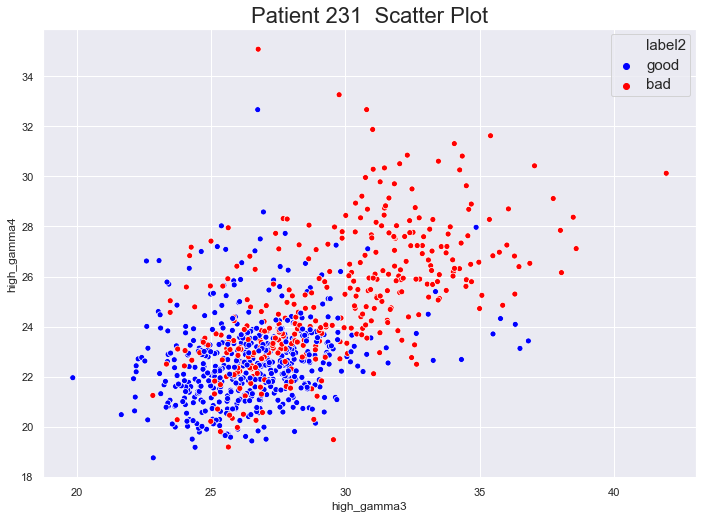

Total outliers removed: 19


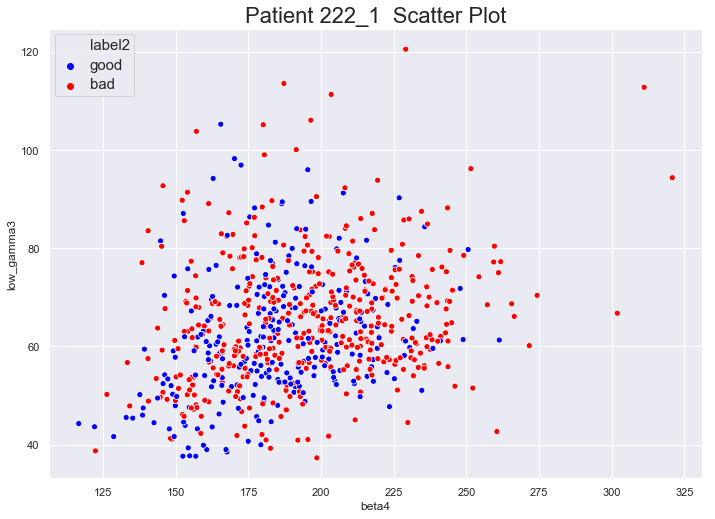

Total outliers removed: 9


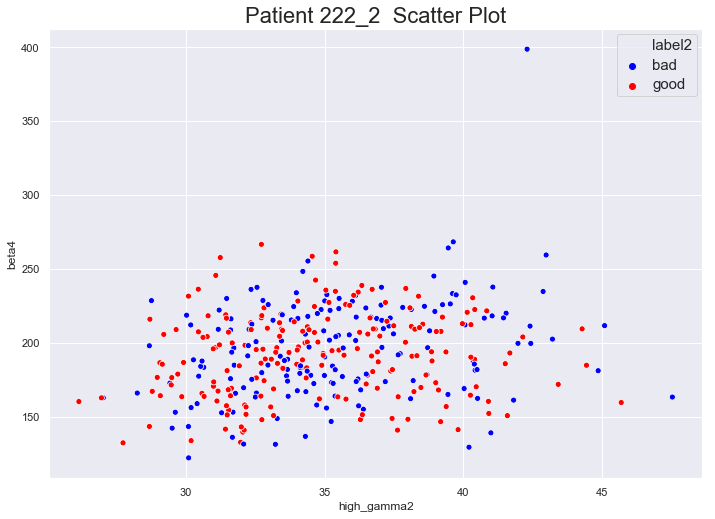

Total outliers removed: 42


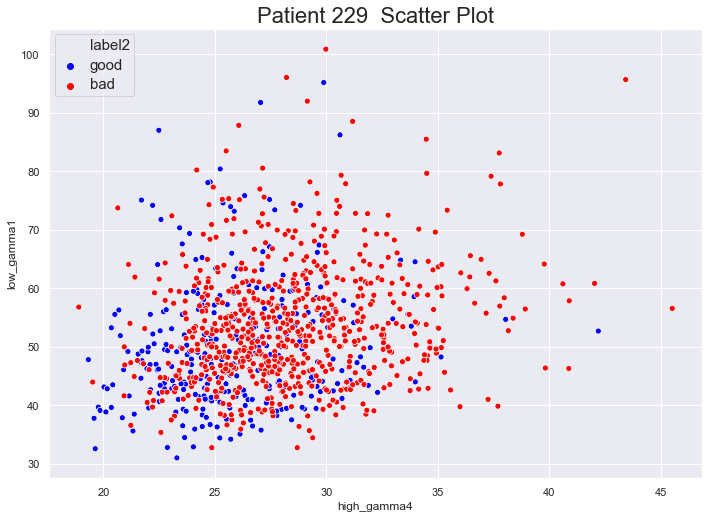

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for pat in pats:
    data_s = plot_funcs.get_scatter_plot_data(pat)
    data_s.loc[data_s['label'] == True, 'label2'] = 'good'
    data_s.loc[data_s['label'] == False, 'label2'] = 'bad'
    sns.set(font_scale=2)
    colors = ["bright red", "sky"]
    #sns.pairplot(data_ml, hue="label_sti", size = 5, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.diverging_palette(240, 10, n=4))
    #g = sns.pairplot(data_s, hue="label", size = 8, vars=pat.features_list, plot_kws={"s": 30},palette=sns.xkcd_palette(colors))
    features = pat.features_list
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.scatterplot(x = features[0], y = features[1], hue = 'label2', data = data_s,legend = 'brief',palette=['blue','red'])
    #plt.tight_layout(pad=5.2, w_pad=0.2, h_pad=0.5)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.title('Patient {0}  Scatter Plot'.format(pat.id), fontsize=hp.label_fontsize)
    #plt.legend(['bad','good'])
    plt.savefig('../fig/'+ pat.id + '/scatter.png')
    plt.show()

### 3D scatter plot

In [ ]:
%matplotlib notebook

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
